Import necessary libraries:

In [18]:
import pandas as pd

Load the datasets:

In [19]:
pitts = pd.read_csv('pittsburgh_neighborhoods.csv')
hospi = pd.read_csv('pittsburgh_hospitals.csv')
pri_care = pd.read_csv('pittsburgh_primary_care.csv')

In [20]:
hospi.head(10)

,Facility,ZIP,Latitude,Longitude
0,UPMC Children's,15224,40.467315,-79.953590
1,UPMC Magee,15213,40.436889,-79.960700
2,UPMC McKeesport,15132,40.351343,-79.849457
3,UPMC Mercy,15219,40.436137,-79.985285
4,UPMC Passavant,15237,40.573319,-80.014525
5,UPMC Presbyterian,15213,40.441544,-79.959356
6,UPMC Shadyside,15232,40.454845,-79.939793
7,UPMC St. Margaret's,15215,40.489286,-79.895994
8,UPMC East,15146,40.436561,-79.760197
9,Allegheny General Hospital,15212,40.457010,-80.003724


In [21]:
pri_care.head(10)

,GROUP_NAME,PRACTICE_ADDR_1,PRACTICE_ADDR_2,PRACTICE_CITY,PRACTICE_STATE,PRACTICE_ZIP,Latitude,Longitude
0,"Picciotti, Isabella M MD",1 Allegheny Square,NaN,Pittsburgh,PA,15212,40.451948,-80.004895
1,UPMC Emergency Medicine Inc,1 Childrens Hospital Drive,4401 Penn Avenue,Pittsburgh,PA,15224,40.467315,-79.953590
2,Hoover Medical Associates PC,100 Delafield Rd,Suite 312,Pittsburgh,PA,15215,40.490244,-79.895719
3,Partners in Nephrology and Endocrinology,100 Delafield Road,100 MAB Suite 212,Pittsburgh,PA,15215,40.506845,-79.908076
4,Bahl and Bahl Med Assoc,"100 Delafield Road, Ste 103",NaN,Pittsburgh,PA,15215,40.490244,-79.895719
5,"Zioncheck, Roger MD PC",100 Eighth Ave,NaN,McKeesport,PA,15132,40.347704,-79.866961
6,Premier Medical Associates CRNP,100 Forest Hills Plaza,NaN,Pittsburgh,PA,15221,40.435067,-79.861938
7,Heritage Valley Convenient Care Retail,100 Hazel Lane,NaN,Sewickley,PA,15143,40.542415,-80.192742
8,"Zioncheck, Roger MD PC",100 Ninth Ave,NaN,McKeesport,PA,15132,40.347396,-79.867398
9,University of Pittsburgh Physicians,100 North Bellfield,NaN,Pittsburgh,PA,15213,40.447147,-79.951826


Initialize dictionaries:

Three dictionaries are initialized: 'hospitals_count', 'primary_care_count', and 'total_health_facilities_count' to store the counts of hospitals, primary care facilities, and total health facilities in each neighborhood, respectively.

In [22]:
#because the data has the zip code rather than the neighborhoods, let's use a dictionary to map zip code to neighborhood
#Note: some zip codes map to more than one neighborhood

zipdict = {15201: ["LAWRENCEVILLE",  "STANTON HEIGHTS"], 15203: ["SOUTHSIDE"], 15206: ["EAST LIBERTY", "MORNINGSIDE", "EAST END"], 15207: ["HAZELWOOD", "GREENFIELD", "GLENWOOD", "GLEN HAZEL", "HAYS", "LINCOLN PL"], 15208: ["HOMEWOOD", "BRUSHTON", "EAST END", "POINT BREEZE"], 
           15210: ["MT WASHINGTON", "DUQUESNE HEIGHTS"], 15213: ["OAKLAND", "BELLEFIELD"], 15217: ["SQUIRREL HILL", "GREENFIELD", "BROWNS HILL"], 15219: ["UPTOWN", "HERRON HILL", "SCHENLEY HEIGHTS"], 15222: ["DOWNTOWN"], 15224: ["BLOOMFIELD", "GARFIELD"], 15226: ["BROOKLINE", "OVERBROOK"],
           15230: ["VETERAN’S HOSPITAL"], 15260: ["THE UNIVERSITY OF PITTSBURGH"], 15282: ["DUQUESNE UNIVERSITY"]}

Count the hospitals and update dictionaries:

The program iterates through the 'hospi' data frame, extracts the zip code from the 'ZIP' column, and updates the 'hospitals_count' and 'total_health_facilities_count' dictionaries for each neighborhood.
Count the primary care facilities and update dictionaries:

The program iterates through the 'pri_care' data frame, extracts the zip code from the 'PRACTICE_ZIP' column, and updates the 'primary_care_count' and 'total_health_facilities_count' dictionaries for each neighborhood.
Print the results:

Finally, the program iterates through the zip codes in the 'zipdict' dictionary and prints the counts of hospitals, primary care facilities, and total health facilities for each neighborhood. It also prints the neighborhood's population from the 'neighPop' dictionary.

In [54]:
# make dictionaries that will keep track of how many hospitals and primary care facilities respectively there are in each neighborhood
hospitals = {}
primary_care = {}

for index, row in hospi.iterrows():
    try:
        zip_code = int(row['ZIP'])
        if zip_code in zipdict:
            for neighborhood in zipdict[zip_code]:
                if neighborhood in hospitals:
                    hospitals[neighborhood] += 1
                else:
                    hospitals[neighborhood] = 1
    except:
        continue

for index, row in pri_care.iterrows():
    try:
        zip_code = int(row['PRACTICE_ZIP'])
        if zip_code in zipdict:
            for neighborhood in zipdict[zip_code]:
                if neighborhood in primary_care:
                    primary_care[neighborhood] += 1
                else:
                    primary_care[neighborhood] = 1
    except:
        continue

# print the counts for hospitals and primary care facilities in each neighborhood
print(hospitals)
print(primary_care)

{'BLOOMFIELD': 2, 'GARFIELD': 2, 'OAKLAND': 2, 'BELLEFIELD': 2, 'UPTOWN': 1, 'HERRON HILL': 1, 'SCHENLEY HEIGHTS': 1}
{'BLOOMFIELD': 18, 'GARFIELD': 18, 'OAKLAND': 47, 'BELLEFIELD': 47, 'UPTOWN': 10, 'HERRON HILL': 10, 'SCHENLEY HEIGHTS': 10, 'SOUTHSIDE': 14, 'BROOKLINE': 5, 'OVERBROOK': 5, 'DOWNTOWN': 13, 'EAST LIBERTY': 15, 'MORNINGSIDE': 15, 'EAST END': 18, 'SQUIRREL HILL': 15, 'GREENFIELD': 19, 'BROWNS HILL': 15, 'MT WASHINGTON': 6, 'DUQUESNE HEIGHTS': 6, 'LAWRENCEVILLE': 4, 'STANTON HEIGHTS': 4, 'HOMEWOOD': 3, 'BRUSHTON': 3, 'POINT BREEZE': 3, 'HAZELWOOD': 4, 'GLENWOOD': 4, 'GLEN HAZEL': 4, 'HAYS': 4, 'LINCOLN PL': 4}


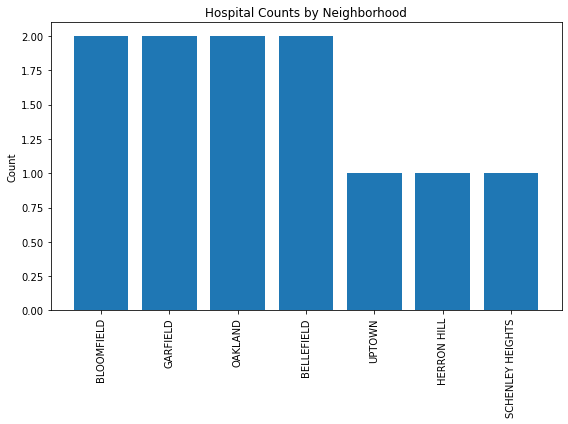

In [58]:
import matplotlib.pyplot as plt

# sort neighborhoods by hospital count in descending order
sorted_hospitals = {k: v for k, v in sorted(hospitals.items(), key=lambda item: item[1], reverse=True)}

# create bar plot for hospital counts
plt.figure(figsize=(8, 6))
plt.bar(sorted_hospitals.keys(), sorted_hospitals.values())
plt.xticks(rotation=90)
plt.title('Hospital Counts by Neighborhood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

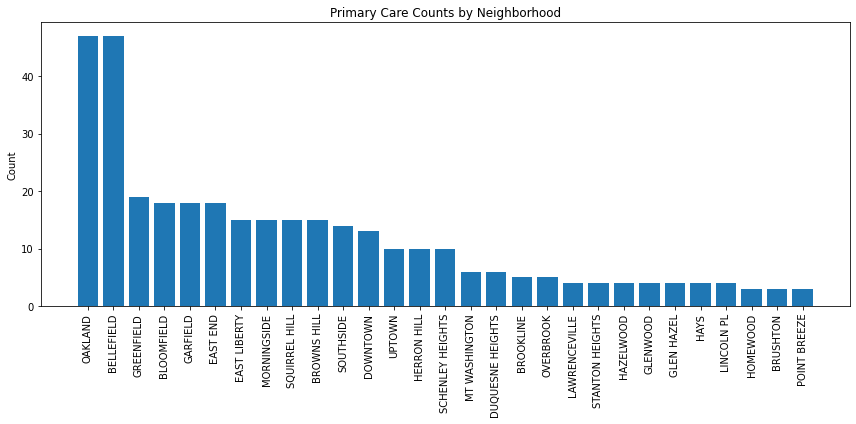

In [59]:
# sort neighborhoods by primary care count in descending order
sorted_primary_care = {k: v for k, v in sorted(primary_care.items(), key=lambda item: item[1], reverse=True)}

# create bar plot for primary care counts
plt.figure(figsize=(12, 6))
plt.bar(sorted_primary_care.keys(), sorted_primary_care.values())
plt.xticks(rotation=90)
plt.title('Primary Care Counts by Neighborhood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()